In [16]:
import torch
import yolov5
from PIL import Image
import numpy as np

model = torch.hub.load("ultralytics/yolov5", "yolov5s", autoshape=False)

model_pt = yolov5.load('yolov5s.pt')

Using cache found in C:\Users\Devon/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-9-19 Python-3.10.11 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 2080, 8192MiB)

YOLOv5  2023-5-15 Python-3.10.11 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 2080, 8192MiB)

Fusing layers... 
YOLOv5s summary: 270 layers, 7235389 parameters, 0 gradients
Adding AutoShape... 


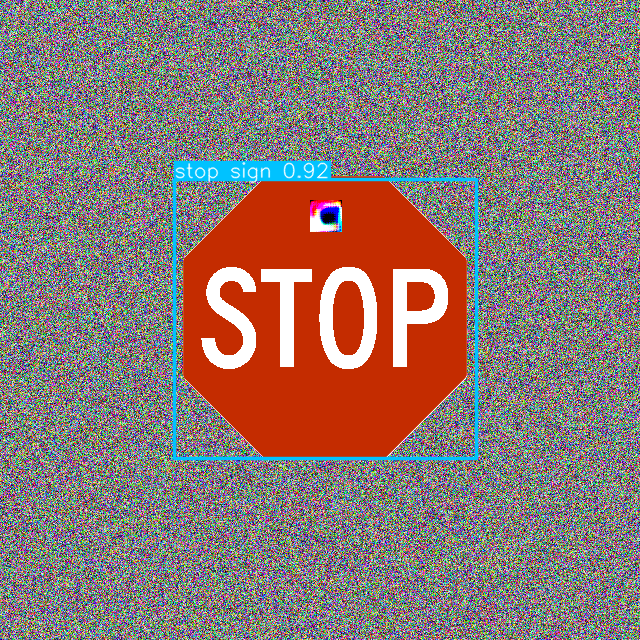

In [10]:
img = "C:\\Users\\Devon\\Project\\NewPatchGen\\outputs\\2023-09-19\\20-38-25\\Patch\\final_patched.png"
results = model_pt(img)

# parse results
predictions = results.pred[0]
boxes = predictions[:, :4] # x1, y1, x2, y2
scores = predictions[:, 4]
categories = predictions[:, 5]

# show detection bounding boxes on image
results.show()

In [51]:
num_cat = 80
target_ID = 11

img = Image.open("C:\\Users\\Devon\\Project\\NewPatchGen\\outputs\\2023-09-19\\20-38-25\\Patch\\final_patched.png")

# convert to np
img_np = np.array(img)
img_np = img_np.transpose(2, 0, 1)
img_np = img_np.astype(np.float32) / 255.0
img_np = np.expand_dims(img_np, axis=0)

# convert to tensor
x = torch.from_numpy(img_np).to(device='cuda:0')
print(x.shape)


torch.Size([1, 3, 640, 640])


In [53]:
outputs = model(x)

if len(outputs) == 3:
    for i in range(len(outputs)):
        # reshape outputs to [batch, grid, 5 + num classes]
        shape = outputs[i].shape
        outputs[i] = outputs[i].reshape(
            shape[0], shape[1] * shape[2] * shape[3], shape[4])
    all_outputs = torch.cat(outputs, axis=1)
else:
    all_outputs = outputs[0]

class_confidence = all_outputs[:, :, 5:5 + num_cat]

print(class_confidence.shape)

# class_confidence = torch.softmax(class_confidence, dim=2)
# class_confidence = torch.sigmoid(class_confidence)

class_confidence = class_confidence[:, :, 11]

max_prob = torch.max(class_confidence, dim=1)
print(max_prob)

torch.Size([1, 25200, 80])
torch.return_types.max(
values=tensor([0.99723], device='cuda:0'),
indices=tensor([24209], device='cuda:0'))
